In [ ]:
#Data Mining Need
#A data mining company needs to segment their customers according to their income and spend ratio.

In [2]:
#Loads the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv(r'C:\Users\1007641\Downloads\CLV.csv')
dataset

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
5,192,148
6,294,153
7,263,173
8,199,162
9,168,174


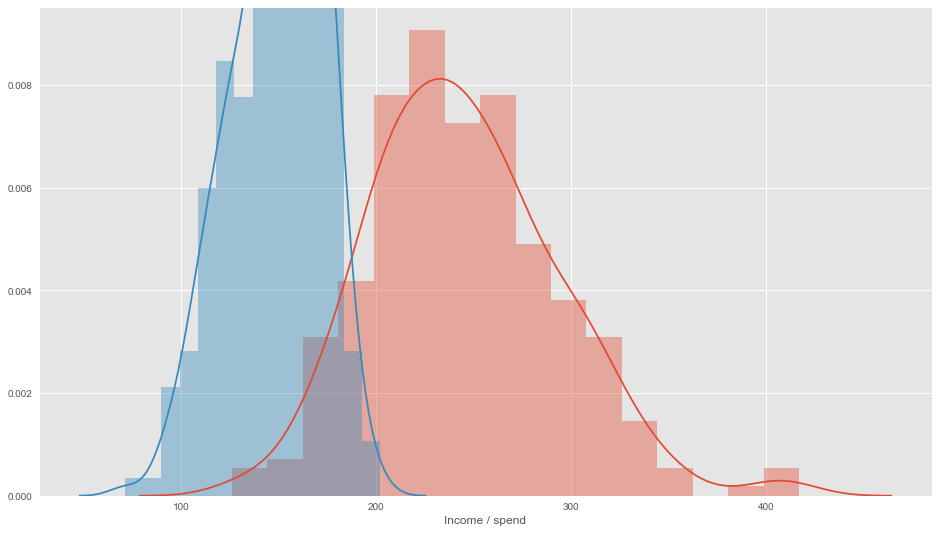

In [13]:
#The picture depicts the range of income, and the amount spends by customers
#Plot styling
import seaborn as sns; sns.set()  
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#Visualising the data
plot_income = sns.distplot(dataset["INCOME"])
plot_spend = sns.distplot(dataset["SPEND"])
plt.xlabel('Income / spend')
plt.show()

In [5]:
#Finding K Value by Elbow Method
#This snippet helps us in finding the different WCSS values for the various values of K.
X=dataset.iloc[:,[0,1]].values
#Elbow method
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300,n_init=10,random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

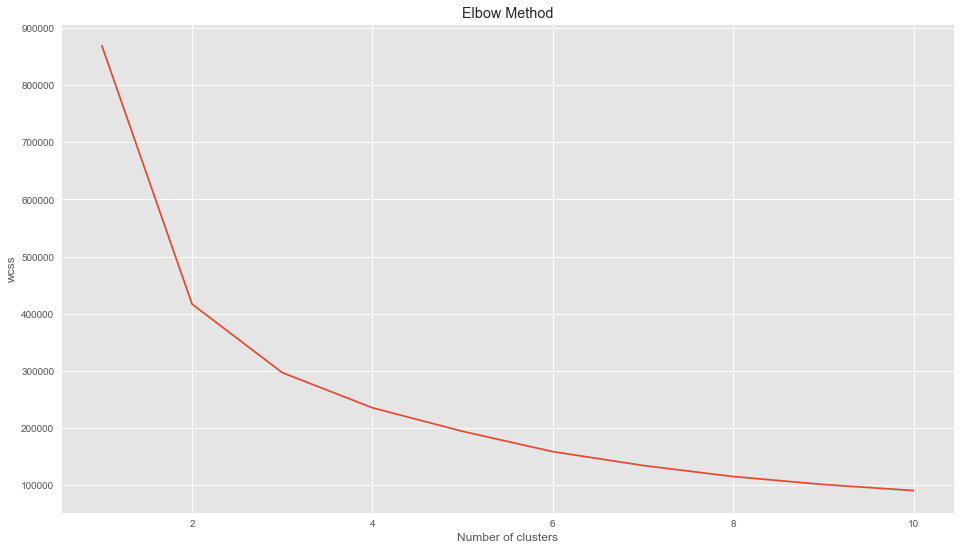

In [6]:
#The Fragment of code that achieves in visualizing the Elbow Curve is shown here:
#ploting
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [7]:
#From the Elbow curve, it is known that WCSS value is minimum for K=4. So, let's fix the number of clusters to 4 and do the K Means Clustering.
##Fitting kmeans to the dataset with K=4

km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

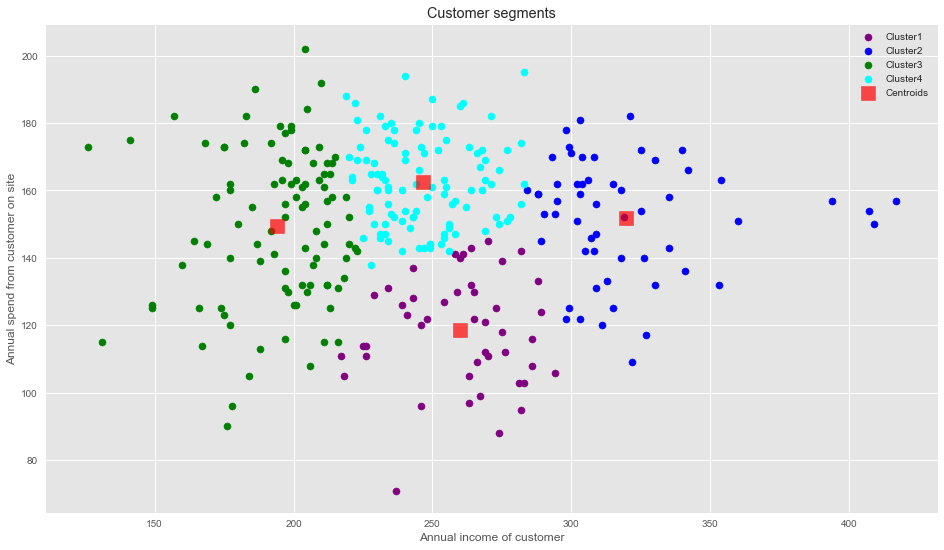

In [11]:
#Visualizing Clusters
#Visualizing the clusters for k=4

plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
#Legend for the plot
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()